### **Project Title: Heart Disease Severity Prediction**  

#### **Introduction**  
Heart disease is a serious health issue that affects millions of people worldwide. Early detection and severity prediction can help in better treatment and prevention. This project aims to build a machine learning model that predicts the severity of heart disease based on different health factors.  

#### **Project Overview**  
The dataset used in this project is from Kaggle: [Heart Disease Dataset](https://www.kaggle.com/datasets/arezaei81/heartcsv). It contains various medical features like age, cholesterol, blood pressure, and more, which help determine heart disease severity. The project involves cleaning the data, performing analysis, and using classification models to make predictions.  

#### **Objectives**  
- Understand and analyze the dataset.  
- Clean and preprocess the data.  
- Apply different classification models for prediction.  
- Compare model performance using accuracy.  
- Deploy the best model for real-world usage.

### **Step 1: Import necessary libraries and load the dataset**

In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart.csv")

# Display the first few rows
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


### **Step 2: Basic Data explorations**

In [41]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [52]:
# Rename columns with full names
# Here we have to rename the columns with descriptive names for better readability.
data = data.rename(columns={
    "age": "Age",                        # age: Age of the patient
    "sex": "Sex",                        # sex: Gender (1 = male, 0 = female)
    "cp": "Chest Pain Type",             # cp: Chest pain type (categorical)
    "trestbps": "Resting Blood Pressure",# trestbps: Resting blood pressure (mm Hg)
    "chol": "Cholesterol",               # chol: Serum cholesterol (mg/dL)
    "fbs": "Fasting Blood Sugar",        # fbs: Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)
    "restecg": "Resting ECG",            # restecg: Resting electrocardiographic results
    "thalach": "Max Heart Rate",         # thalach: Maximum heart rate achieved
    "exang": "Exercise Induced Angina",  # exang: Exercise-induced angina (1 = yes, 0 = no)
    "oldpeak": "ST Depression",          # oldpeak: ST depression induced by exercise
    "slope": "Slope of ST Segment",      # slope: Slope of the peak exercise ST segment
    "ca": "Number of Major Vessels",     # ca: Number of major vessels colored by fluoroscopy
    "thal": "Thalassemia",               # thal: Thalassemia (categorical)
    "target": "Target"   # target: Heart disease (1 = disease, 0 = no disease)
})

# Display updated column names
data.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [43]:
# Display 5 random samples from the dataset
data.sample(5)

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1


In [44]:
# Shape of the datasets
print(data.shape)

(303, 14)


In [45]:
# Check dataset information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest Pain Type          303 non-null    int64  
 3   Resting Blood Pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting Blood Sugar      303 non-null    int64  
 6   Resting ECG              303 non-null    int64  
 7   Max Heart Rate           303 non-null    int64  
 8   Exercise Induced Angina  303 non-null    int64  
 9   ST Depression            303 non-null    float64
 10  Slope of ST Segment      303 non-null    int64  
 11  Number of Major Vessels  303 non-null    int64  
 12  Thalassemia              303 non-null    int64  
 13  Target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [46]:
# Check for missing values
print(data.isnull().sum())

Age                        0
Sex                        0
Chest Pain Type            0
Resting Blood Pressure     0
Cholesterol                0
Fasting Blood Sugar        0
Resting ECG                0
Max Heart Rate             0
Exercise Induced Angina    0
ST Depression              0
Slope of ST Segment        0
Number of Major Vessels    0
Thalassemia                0
Target                     0
dtype: int64


In [47]:
# Summary statistics
data.describe()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope of ST Segment,Number of Major Vessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


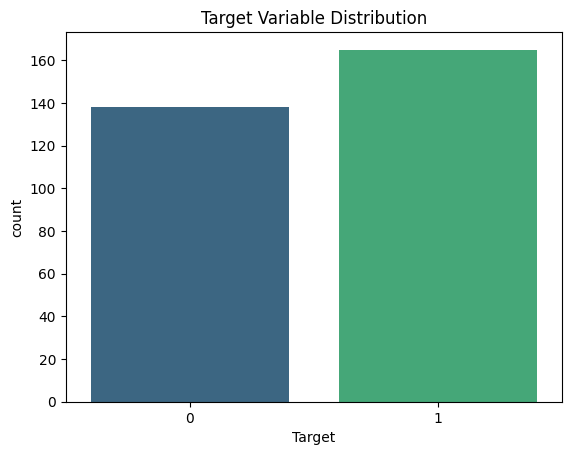

In [48]:
# Count plot for Target Column
sns.countplot(x="Target", data=data, hue="Target", palette="viridis", legend=False)
plt.title("Target Variable Distribution")
plt.show()


In [49]:
# Checking correlation between columns
print(data.corr()["Target"].abs().sort_values(ascending=False))

Target                     1.000000
Exercise Induced Angina    0.436757
Chest Pain Type            0.433798
ST Depression              0.430696
Max Heart Rate             0.421741
Number of Major Vessels    0.391724
Slope of ST Segment        0.345877
Thalassemia                0.344029
Sex                        0.280937
Age                        0.225439
Resting Blood Pressure     0.144931
Resting ECG                0.137230
Cholesterol                0.085239
Fasting Blood Sugar        0.028046
Name: Target, dtype: float64


====> This shows that most columns are moderately correlated with target, but 'Fasting Blood Sugar(fbs)' is very weakly correlated.

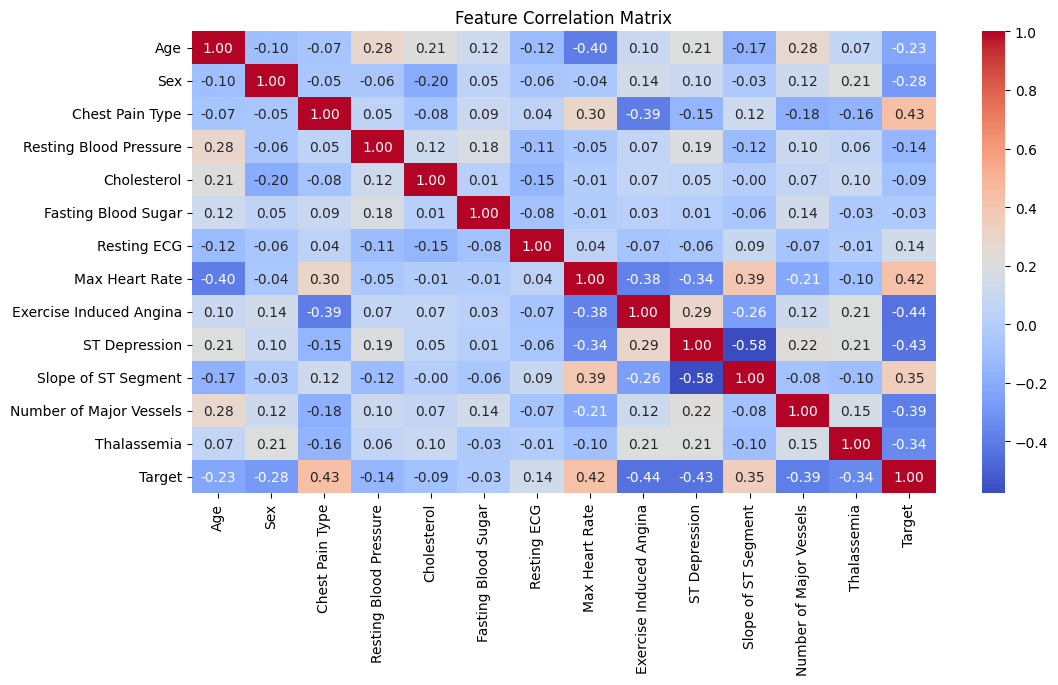

In [50]:
# Check correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### **Step 3: Exploratory Data Analysis (EDA)**

In [55]:
# Print Unique Values for Each Column
for column in data.columns:
    print(f"Unique values in '{column}':\n{data[column].unique()}\n")


Unique values in 'Age':
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Unique values in 'Sex':
[1 0]

Unique values in 'Chest Pain Type':
[3 2 1 0]

Unique values in 'Resting Blood Pressure':
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Unique values in 'Cholesterol':
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 

=====> We concluded that in out datasets, there are categorical and numerical columns. So Before performing EDA, we explore all columns in details as:

Here’s the classification of **categorical** and **numerical** columns in our dataset:
##### **Categorical Columns (Discrete Values)**

| Column Name                 | Description                              | Unique Values Example |
|-----------------------------|------------------------------------------|----------------------|
| **Sex**                     | Gender (0 = Female, 1 = Male)            | [0, 1]             |
| **Chest Pain Type**         | Type of chest pain (0-3)                 | [0, 1, 2, 3]       |
| **Fasting Blood Sugar**     | Blood sugar > 120 mg/dl (0 = No, 1 = Yes) | [0, 1]             |
| **Resting ECG**             | Resting electrocardiographic results      | [0, 1, 2]          |
| **Exercise Induced Angina** | Exercise-induced angina (0 = No, 1 = Yes) | [0, 1]             |
| **Slope of ST Segment**     | Slope of peak exercise ST segment         | [0, 1, 2]          |
| **Number of Major Vessels** | Major vessels (0-3) detected by fluoroscopy | [0, 1, 2, 3, 4]  |
| **Thalassemia**             | Blood disorder indicator (1-3)           | [1, 2, 3]          |
| **Target**                  | Heart disease presence (0 = No, 1 = Yes) | [0, 1]             |

-------------------------------------------------

##### **Numerical Columns (Continuous Values)**

| Column Name                      | Description                            | Example Values |
|-----------------------------------|----------------------------------------|---------------|
| **Age**                          | Age in years                          | [63, 37, 41] |
| **Resting Blood Pressure**        | Blood pressure in mm Hg               | [145, 130, 120] |
| **Cholesterol**                   | Serum cholesterol in mg/dl            | [233, 250, 204] |
| **Max Heart Rate**                | Maximum heart rate achieved           | [150, 187, 172] |
| **ST Depression**                 | ST depression induced by exercise     | [2.3, 3.5, 1.4] |

-------------------------------------------------
Here are the plot that we will use for plotting purpose in further steps.
- Categorical features ===> Countplot 
- Continuous features ===> Histogram & Boxplot 
- Relation with target ===> Boxplot or Countplot